# Sheet desplaying computed batch results with Torben´s recipe

Import packages

In [1]:
import numpy as np
import pandas as pd
import casadi
import  pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, sys

mpl.rcParams["font.size"] = 9
mpl.rcParams["lines.linewidth"] = 3
mpl.rcParams["axes.grid"] = True

from column_variable_init_conds import template_model, template_simulator, update_u

Load results

In [4]:
# Specify batch and simulation
batch = "Batch 1"  # Should be of the format "Batch x" with x = 1,... ,10
sim_num = 7
result_path = "./Data/{}/sim{}".format(batch,sim_num)
print(os.listdir(result_path))

['ts_Batch 1_50_6000_1.dat', 'us_Batch 1_50_6000_1.dat', 'xs_Batch 1_50_6000_1.dat', 'zs_Batch 1_50_6000_1.dat']


In [5]:
import pickle
pickle.load(open("./Data/DAE_variables.dat","rb"))

['e0_P_LV_st0_i1',
 'e0_P_LV_st0_i2',
 'e0_P_LV_st1_i1',
 'e0_P_LV_st1_i2',
 'e0_P_LV_st2_i1',
 'e0_P_LV_st2_i2',
 'e0_P_LV_st3_i1',
 'e0_P_LV_st3_i2',
 'e0_P_LV_st4_i1',
 'e0_P_LV_st4_i2',
 'e0_P_LV_st5_i1',
 'e0_P_LV_st5_i2',
 'e0_P_LV_st6_i1',
 'e0_P_LV_st6_i2',
 'e0_P_LV_st7_i1',
 'e0_P_LV_st7_i2',
 'e0_P_LV_st8_i1',
 'e0_P_LV_st8_i2',
 'e0_P_LV_st9_i1',
 'e0_P_LV_st9_i2',
 'e0_h_F_st9_i1',
 'e0_h_F_st9_i2',
 'e0_h_F_st9_i3',
 'e0_h_LN2_st9_i1',
 'e0_h_LN2_st9_i2',
 'e0_h_LN2_st9_i3',
 'e0_h_LVN2_st9_i1',
 'e0_h_LVN2_st9_i2',
 'e0_h_LVN2_st9_i3',
 'e0_h_LV_st0_i1',
 'e0_h_LV_st0_i2',
 'e0_h_LV_st0_i3',
 'e0_h_LV_st1_i1',
 'e0_h_LV_st1_i2',
 'e0_h_LV_st1_i3',
 'e0_h_LV_st2_i1',
 'e0_h_LV_st2_i2',
 'e0_h_LV_st2_i3',
 'e0_h_LV_st3_i1',
 'e0_h_LV_st3_i2',
 'e0_h_LV_st3_i3',
 'e0_h_LV_st4_i1',
 'e0_h_LV_st4_i2',
 'e0_h_LV_st4_i3',
 'e0_h_LV_st5_i1',
 'e0_h_LV_st5_i2',
 'e0_h_LV_st5_i3',
 'e0_h_LV_st6_i1',
 'e0_h_LV_st6_i2',
 'e0_h_LV_st6_i3',
 'e0_h_LV_st7_i1',
 'e0_h_LV_st7_i2',
 'e0_h

In [5]:
# specify file names manually ==> set aut_pick to False
aut_pick = True
x_file_name = "xs_Batch 1_500_3000.dat"
z_file_name = "zs_Batch 1_500_3000.dat"
u_file_name = "us_Batch 1_500_3000.dat"
t_file_name = "ts_Batch 1_500_3000.dat" 

# pick files of same specification randomly (if aut_pick is set to True)
if aut_pick:
    for file_name in os.listdir(result_path):
        if "xs_{}".format(batch) in file_name:
            specification = file_name[len("xs_{}".format(batch)):]
            break
            
    x_file_name = "xs_{}".format(batch) + specification
    z_file_name = "zs_{}".format(batch) + specification    
    u_file_name = "us_{}".format(batch) + specification
    t_file_name = "ts_{}".format(batch) + specification
    
xs = pickle.load(open(result_path+"/"+x_file_name,"rb"))
zs = pickle.load(open(result_path+"/"+z_file_name,"rb"))
us = pickle.load(open(result_path+"/"+u_file_name,"rb"))
ts = pickle.load(open(result_path+"/"+t_file_name,"rb"))
    

Load Torben´s data

In [6]:
trajectory = pd.read_pickle("./Data/alldata.pck")
ind0 = int(specification[:-4].split("_")[1])
ind_end = int(specification[:-4].split("_")[2])

In [7]:
def compare_plots(var_dict:dict,index=0):
    i = 100
    
    for var_type, variable_names in var_dict.items():
        if var_type.lower() == "z":
            spec = "_z"
            data_dict = zs
            color = "b"
        elif var_type.lower() == "u":
            spec = "_u"
            data_dict = us
            color = "k"
        elif var_type.lower() == "x":
            spec = "_x"
            data_dict = xs
            color = "b"
        ind0_traj, ind_end_traj = 0, 8400
        for var_name in variable_names:
            i +=1
            plt.figure(num=i)
            plt.plot(ts+trajectory["Time"].iloc[ind0],data_dict[var_name],"{}o-".format(color),label="model")
            plt.plot(trajectory["Time"].to_numpy()[ind0_traj:ind_end_traj],
                     trajectory["Flowsheet."+var_name].to_numpy()[ind0_traj:ind_end_traj],"y",label="data")
            plt.legend()
            plt.xlabel("Time in seconds")
            plt.title(var_name)

Display specified results in comparison with Torben´s data

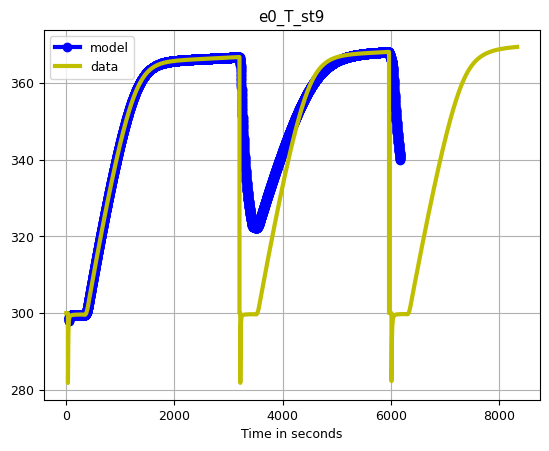

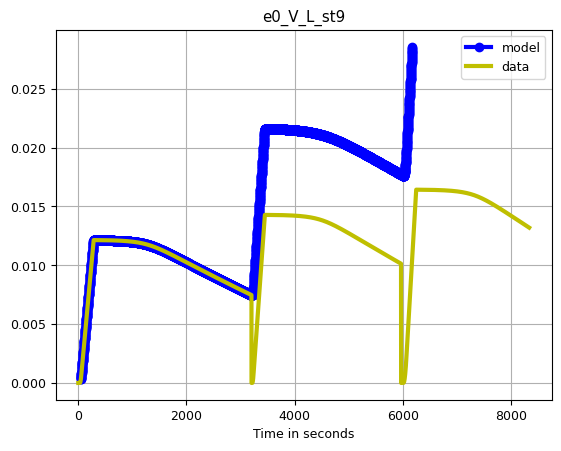

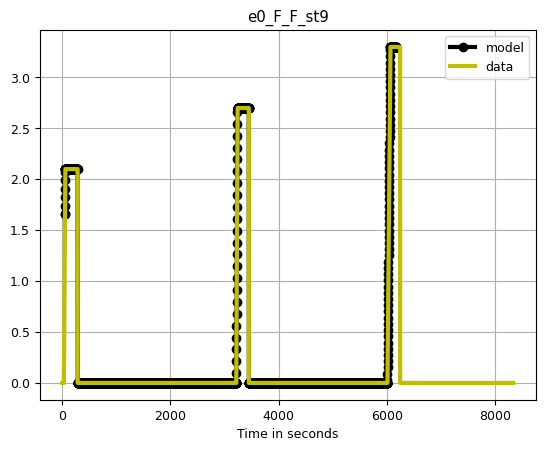

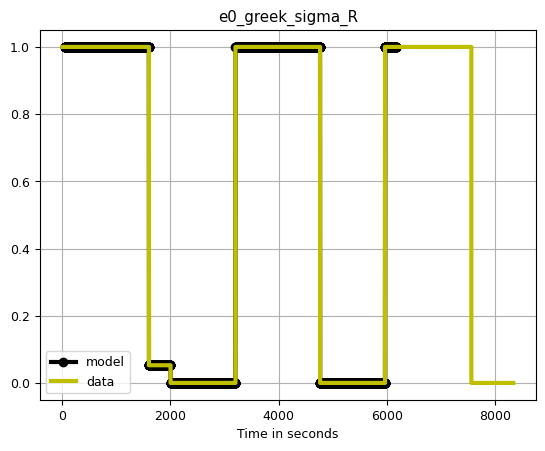

In [8]:
var_dict = {"x":[],"z":["e0_T_st9","e0_V_L_st9"],"u":["e0_F_F_st9","e0_greek_sigma_R"]}
compare_plots(var_dict)

In [9]:
trajectory["Flowsheet.e0_V_L_st9"].iloc[50]

0.0003192848055823246

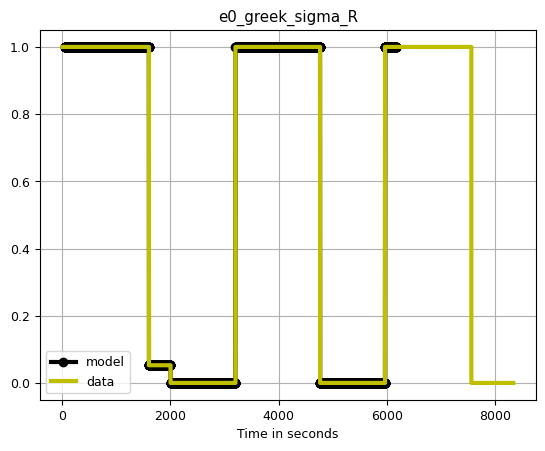

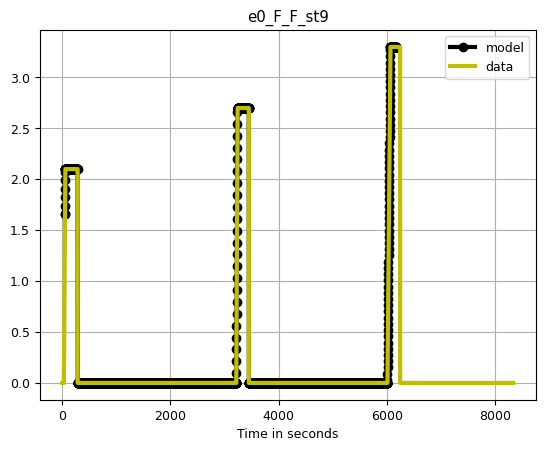

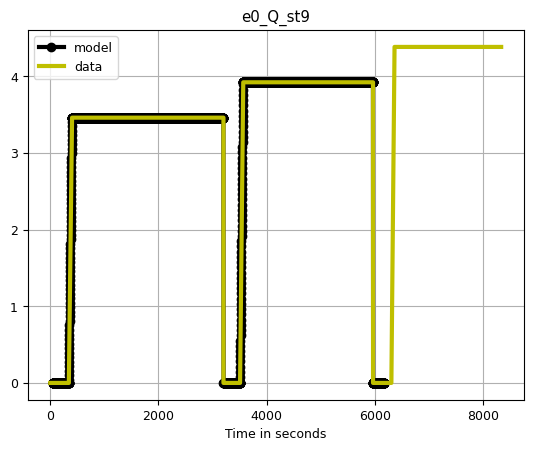

In [10]:
# var_dict2 = {"x":[],"z":[],"u":list(us.keys())}
relevant_us = ["e0_greek_sigma_R","e0_F_F_st9","e0_Q_st9"]
var_dict2 = {"x":[],"z":[],"u":relevant_us}
compare_plots(var_dict2)

In [11]:
list(us.keys())
ts00 = trajectory["Time"].iloc[0:200].where(np.abs(trajectory["Flowsheet.e0_F_F_st9"])<1e-5).dropna().to_numpy()
print(ts00.shape)
print("\n\n",ts00)

(33,)


 [ 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
 14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
 28.  29.  30.  30.1 30.1]


In [12]:
trajectory["Flowsheet.e0_F_F_st9"]!=0
ts00.shape

(33,)